In [1485]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1486]:
original_data = pd.read_csv('data_processed.csv')

In [1487]:
data = original_data.copy()

In [1488]:
data

,name,type,length_km,duration_hour,difficulty,region,type_of_view,rating,elevation_gain
0,MacLehose Trail (Section 1) Pak Tam Chung to L...,Long-distance Trail,10.600000,3.000000,Hard,Sai Kung,"beach, lake",4.500000,1250.0
1,MacLehose Trail (Section 2) Long Ke to Pak Tam Au,Long-distance Trail,13.500000,5.000000,Hard,Sai Kung,"beauty of the coast of Hong Kong, Sai Wan beac...",4.700000,2168.0
2,MacLehose Trail (Section 3) Pak Tam Au to Kei ...,Long-distance Trail,10.200000,4.000000,Hard,Sai Kung,"forests, views",4.500000,1994.0
3,MacLehose Trail (Section 4) Kei Ling Ha to Tat...,Long-distance Trail,12.700000,5.000000,Hard,Sai Kung,"views, wildflowers",4.500000,2805.0
4,MacLehose Trail (Section 5) Tate's Cairn to Ta...,Long-distance Trail,10.600000,4.500000,Hard,Central New Territories,forests and views,4.500000,1791.0
...,...,...,...,...,...,...,...,...,...
84,Hong Kong Trail (Section 6) Mount Parker Road ...,Hon g Kong Trail,9.242632,2.385429,Moderate,Hong Kong Island,Tai Tam Reservoir,4.400000,180.0
85,MacLehose Trail overall,Long-distance Trail,100.000000,2.385429,Hard,New Territories,"beaches, mountains",4.300000,16571.0
86,Hong Kong Trail overall,Long-distance Trail,50.000000,2.385429,Moderate,Hong Kong Island,Views and tourist attractions,4.600000,5524.0
87,Lantau Trail overall,Long-distance Trail,70.000000,2.385429,Moderate,Lantau,"mountain peaks, traditional villages, coastal ...",4.400000,10036.0


In [1489]:
print(data['type'].unique())

['Long-distance Trail' 'Hong Kong Trail' 'Lantau Trail' 'Wilson Trail'
 'Country Trail' 'Nature Trail' 'Tree Walk' 'Family Walk' 'Geo Route'
 'Recommended Route' 'Hon g Kong Trail']


In [1490]:
data['type'].value_counts()

type
Country Trail          21
Long-distance Trail    14
Recommended Route      10
Hong Kong Trail         8
Nature Trail            7
Wilson Trail            7
Lantau Trail            6
Tree Walk               6
Family Walk             5
Geo Route               4
Hon g Kong Trail        1
Name: count, dtype: int64

In [1491]:
data['type'] = data['type'].replace('Hon g Kong Trail','Hong Kong Trail' )

In [1492]:
data

,name,type,length_km,duration_hour,difficulty,region,type_of_view,rating,elevation_gain
0,MacLehose Trail (Section 1) Pak Tam Chung to L...,Long-distance Trail,10.600000,3.000000,Hard,Sai Kung,"beach, lake",4.500000,1250.0
1,MacLehose Trail (Section 2) Long Ke to Pak Tam Au,Long-distance Trail,13.500000,5.000000,Hard,Sai Kung,"beauty of the coast of Hong Kong, Sai Wan beac...",4.700000,2168.0
2,MacLehose Trail (Section 3) Pak Tam Au to Kei ...,Long-distance Trail,10.200000,4.000000,Hard,Sai Kung,"forests, views",4.500000,1994.0
3,MacLehose Trail (Section 4) Kei Ling Ha to Tat...,Long-distance Trail,12.700000,5.000000,Hard,Sai Kung,"views, wildflowers",4.500000,2805.0
4,MacLehose Trail (Section 5) Tate's Cairn to Ta...,Long-distance Trail,10.600000,4.500000,Hard,Central New Territories,forests and views,4.500000,1791.0
...,...,...,...,...,...,...,...,...,...
84,Hong Kong Trail (Section 6) Mount Parker Road ...,Hong Kong Trail,9.242632,2.385429,Moderate,Hong Kong Island,Tai Tam Reservoir,4.400000,180.0
85,MacLehose Trail overall,Long-distance Trail,100.000000,2.385429,Hard,New Territories,"beaches, mountains",4.300000,16571.0
86,Hong Kong Trail overall,Long-distance Trail,50.000000,2.385429,Moderate,Hong Kong Island,Views and tourist attractions,4.600000,5524.0
87,Lantau Trail overall,Long-distance Trail,70.000000,2.385429,Moderate,Lantau,"mountain peaks, traditional villages, coastal ...",4.400000,10036.0


In [1493]:
type = data[['type']]

In [1494]:
type

,type
0,Long-distance Trail
1,Long-distance Trail
2,Long-distance Trail
3,Long-distance Trail
4,Long-distance Trail
...,...
84,Hong Kong Trail
85,Long-distance Trail
86,Long-distance Trail
87,Long-distance Trail


In [1495]:
#Use label binarizer for type . why?
from sklearn.preprocessing import OneHotEncoder
encoder_1hot_type = OneHotEncoder(sparse_output=False) # If the output is a sparse matrix, then we will not able to make the dataframe later
type_1hot = encoder_1hot_type.fit_transform(type)
type_1hot
# Change to one-hot type

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [1496]:
encoder_1hot_type.categories_[0]

array(['Country Trail', 'Family Walk', 'Geo Route', 'Hong Kong Trail',
       'Lantau Trail', 'Long-distance Trail', 'Nature Trail',
       'Recommended Route', 'Tree Walk', 'Wilson Trail'], dtype=object)

In [1497]:
df_type_1hot = pd.DataFrame(type_1hot, columns=encoder_1hot_type.get_feature_names_out(['type']))

In [1498]:
df_type_1hot

,type_Country Trail,type_Family Walk,type_Geo Route,type_Hong Kong Trail,type_Lantau Trail,type_Long-distance Trail,type_Nature Trail,type_Recommended Route,type_Tree Walk,type_Wilson Trail
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
84,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
85,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [1499]:
data = pd.concat([data, df_type_1hot], axis=1) # Concatenate vertically

In [1500]:
data

,name,type,length_km,duration_hour,difficulty,region,type_of_view,rating,elevation_gain,type_Country Trail,type_Family Walk,type_Geo Route,type_Hong Kong Trail,type_Lantau Trail,type_Long-distance Trail,type_Nature Trail,type_Recommended Route,type_Tree Walk,type_Wilson Trail
0,MacLehose Trail (Section 1) Pak Tam Chung to L...,Long-distance Trail,10.600000,3.000000,Hard,Sai Kung,"beach, lake",4.500000,1250.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,MacLehose Trail (Section 2) Long Ke to Pak Tam Au,Long-distance Trail,13.500000,5.000000,Hard,Sai Kung,"beauty of the coast of Hong Kong, Sai Wan beac...",4.700000,2168.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,MacLehose Trail (Section 3) Pak Tam Au to Kei ...,Long-distance Trail,10.200000,4.000000,Hard,Sai Kung,"forests, views",4.500000,1994.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,MacLehose Trail (Section 4) Kei Ling Ha to Tat...,Long-distance Trail,12.700000,5.000000,Hard,Sai Kung,"views, wildflowers",4.500000,2805.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,MacLehose Trail (Section 5) Tate's Cairn to Ta...,Long-distance Trail,10.600000,4.500000,Hard,Central New Territories,forests and views,4.500000,1791.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Hong Kong Trail (Section 6) Mount Parker Road ...,Hong Kong Trail,9.242632,2.385429,Moderate,Hong Kong Island,Tai Tam Reservoir,4.400000,180.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
85,MacLehose Trail overall,Long-distance Trail,100.000000,2.385429,Hard,New Territories,"beaches, mountains",4.300000,16571.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
86,Hong Kong Trail overall,Long-distance Trail,50.000000,2.385429,Moderate,Hong Kong Island,Views and tourist attractions,4.600000,5524.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
87,Lantau Trail overall,Long-distance Trail,70.000000,2.385429,Moderate,Lantau,"mountain peaks, traditional villages, coastal ...",4.400000,10036.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [1501]:
print(data['difficulty'].unique())

['Hard' 'Moderate' 'Easy']


In [1502]:
data['difficulty'].value_counts()

difficulty
Hard        44
Easy        23
Moderate    22
Name: count, dtype: int64

In [1503]:
data[['difficulty']]

,difficulty
0,Hard
1,Hard
2,Hard
3,Hard
4,Hard
...,...
84,Moderate
85,Hard
86,Moderate
87,Moderate


In [1504]:
#Use ordinal binarizer for difficulty -> correlation between categories
from sklearn.preprocessing import OrdinalEncoder
categories = [['Easy', 'Moderate', 'Hard']] 
encoder_ordinal = OrdinalEncoder(categories=categories)
difficulty = data[['difficulty']] # Make the 'difficulty' column a dataframe because OrdinalEncoder needs a dataframe
difficulty_encoded = encoder_ordinal.fit_transform(difficulty)
difficulty_encoded



array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],

In [1505]:
data['difficulty_encoded'] = difficulty_encoded

In [1506]:
data

,name,type,length_km,duration_hour,difficulty,region,type_of_view,rating,elevation_gain,type_Country Trail,type_Family Walk,type_Geo Route,type_Hong Kong Trail,type_Lantau Trail,type_Long-distance Trail,type_Nature Trail,type_Recommended Route,type_Tree Walk,type_Wilson Trail,difficulty_encoded
0,MacLehose Trail (Section 1) Pak Tam Chung to L...,Long-distance Trail,10.600000,3.000000,Hard,Sai Kung,"beach, lake",4.500000,1250.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
1,MacLehose Trail (Section 2) Long Ke to Pak Tam Au,Long-distance Trail,13.500000,5.000000,Hard,Sai Kung,"beauty of the coast of Hong Kong, Sai Wan beac...",4.700000,2168.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
2,MacLehose Trail (Section 3) Pak Tam Au to Kei ...,Long-distance Trail,10.200000,4.000000,Hard,Sai Kung,"forests, views",4.500000,1994.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,MacLehose Trail (Section 4) Kei Ling Ha to Tat...,Long-distance Trail,12.700000,5.000000,Hard,Sai Kung,"views, wildflowers",4.500000,2805.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
4,MacLehose Trail (Section 5) Tate's Cairn to Ta...,Long-distance Trail,10.600000,4.500000,Hard,Central New Territories,forests and views,4.500000,1791.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Hong Kong Trail (Section 6) Mount Parker Road ...,Hong Kong Trail,9.242632,2.385429,Moderate,Hong Kong Island,Tai Tam Reservoir,4.400000,180.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
85,MacLehose Trail overall,Long-distance Trail,100.000000,2.385429,Hard,New Territories,"beaches, mountains",4.300000,16571.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
86,Hong Kong Trail overall,Long-distance Trail,50.000000,2.385429,Moderate,Hong Kong Island,Views and tourist attractions,4.600000,5524.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
87,Lantau Trail overall,Long-distance Trail,70.000000,2.385429,Moderate,Lantau,"mountain peaks, traditional villages, coastal ...",4.400000,10036.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [1507]:
print(data['region'].unique())

['Sai Kung' 'Central New Territories' 'West New Territories'
 'Hong Kong Island' 'Lantau' 'North New Territories' 'New Territories'
 'Hong Kong Island / New Territories']


In [1508]:
data['region'].value_counts()
# Gộp -> others ==2?

region
Sai Kung                              19
Hong Kong Island                      18
Central New Territories               15
Lantau                                15
West New Territories                  12
North New Territories                  8
New Territories                        1
Hong Kong Island / New Territories     1
Name: count, dtype: int64

In [1509]:
data['region'] = data['region'].replace('Hong Kong Island / New Territories', 'Others')
data['region'] = data['region'].replace('New Territories', 'Others')

In [1510]:
data['region'].value_counts()

region
Sai Kung                   19
Hong Kong Island           18
Central New Territories    15
Lantau                     15
West New Territories       12
North New Territories       8
Others                      2
Name: count, dtype: int64

In [1511]:
encoder_1hot_region = OneHotEncoder(sparse_output=False)
region = data[['region']] # Same tatics again??
region_1hot = encoder_1hot_region.fit_transform(region)
region_1hot


array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
 

In [1512]:
encoder_1hot_region.categories_[0]

array(['Central New Territories', 'Hong Kong Island', 'Lantau',
       'North New Territories', 'Others', 'Sai Kung',
       'West New Territories'], dtype=object)

In [1513]:
df_region_1hot = pd.DataFrame(region_1hot, columns=encoder_1hot_region.get_feature_names_out(['region']))
data = pd.concat([data, df_region_1hot], axis=1) # Concatenate vertically

In [1514]:
data

,name,type,length_km,duration_hour,difficulty,region,type_of_view,rating,elevation_gain,type_Country Trail,...,type_Tree Walk,type_Wilson Trail,difficulty_encoded,region_Central New Territories,region_Hong Kong Island,region_Lantau,region_North New Territories,region_Others,region_Sai Kung,region_West New Territories
0,MacLehose Trail (Section 1) Pak Tam Chung to L...,Long-distance Trail,10.600000,3.000000,Hard,Sai Kung,"beach, lake",4.500000,1250.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,MacLehose Trail (Section 2) Long Ke to Pak Tam Au,Long-distance Trail,13.500000,5.000000,Hard,Sai Kung,"beauty of the coast of Hong Kong, Sai Wan beac...",4.700000,2168.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,MacLehose Trail (Section 3) Pak Tam Au to Kei ...,Long-distance Trail,10.200000,4.000000,Hard,Sai Kung,"forests, views",4.500000,1994.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,MacLehose Trail (Section 4) Kei Ling Ha to Tat...,Long-distance Trail,12.700000,5.000000,Hard,Sai Kung,"views, wildflowers",4.500000,2805.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,MacLehose Trail (Section 5) Tate's Cairn to Ta...,Long-distance Trail,10.600000,4.500000,Hard,Central New Territories,forests and views,4.500000,1791.0,0.0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Hong Kong Trail (Section 6) Mount Parker Road ...,Hong Kong Trail,9.242632,2.385429,Moderate,Hong Kong Island,Tai Tam Reservoir,4.400000,180.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
85,MacLehose Trail overall,Long-distance Trail,100.000000,2.385429,Hard,Others,"beaches, mountains",4.300000,16571.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
86,Hong Kong Trail overall,Long-distance Trail,50.000000,2.385429,Moderate,Hong Kong Island,Views and tourist attractions,4.600000,5524.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
87,Lantau Trail overall,Long-distance Trail,70.000000,2.385429,Moderate,Lantau,"mountain peaks, traditional villages, coastal ...",4.400000,10036.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [1515]:
data.describe()

,length_km,duration_hour,rating,elevation_gain,type_Country Trail,type_Family Walk,type_Geo Route,type_Hong Kong Trail,type_Lantau Trail,type_Long-distance Trail,...,type_Tree Walk,type_Wilson Trail,difficulty_encoded,region_Central New Territories,region_Hong Kong Island,region_Lantau,region_North New Territories,region_Others,region_Sai Kung,region_West New Territories
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,...,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,9.242632,2.385429,4.270769,1623.465187,0.235955,0.056180,0.044944,0.101124,0.067416,0.157303,...,0.067416,0.078652,1.235955,0.168539,0.202247,0.168539,0.089888,0.022472,0.213483,0.134831
std,15.203789,1.253076,0.277457,2675.625085,0.427000,0.231573,0.208355,0.303200,0.252161,0.366149,...,0.252161,0.270720,0.839676,0.376465,0.403951,0.376465,0.287641,0.149052,0.412088,0.343479
min,0.230000,0.250000,3.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.500000,4.200000,515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,2.385429,4.270769,1250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.242632,3.000000,4.400000,1623.465187,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,6.000000,4.700000,17740.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1516]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data.select_dtypes(np.number))
data_normalized

array([[ 8.97841285e-02,  4.93229048e-01,  8.30865114e-01, ...,
        -1.51619609e-01,  1.91942974e+00, -3.94771017e-01],
       [ 2.81606753e-01,  2.09834450e+00,  1.55578099e+00, ...,
        -1.51619609e-01,  1.91942974e+00, -3.94771017e-01],
       [ 6.33258355e-02,  1.29578677e+00,  8.30865114e-01, ...,
        -1.51619609e-01,  1.91942974e+00, -3.94771017e-01],
       ...,
       [ 2.69592599e+00,  3.56407226e-16,  1.19332305e+00, ...,
        -1.51619609e-01, -5.20988072e-01, -3.94771017e-01],
       [ 4.01884064e+00,  3.56407226e-16,  4.68407178e-01, ...,
        -1.51619609e-01, -5.20988072e-01, -3.94771017e-01],
       [ 4.54800650e+00,  3.56407226e-16,  0.00000000e+00, ...,
         6.59545298e+00, -5.20988072e-01, -3.94771017e-01]])

In [1517]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20).fit(data.select_dtypes(np.number))
labels = kmeans.labels_


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [1518]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data.select_dtypes(np.number), labels)
silhouette_avg

np.float64(0.6429815963086508)

In [1523]:
k_values = range(2, 20)  # Thử k từ 2 đến 9
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_normalized)
    score = silhouette_score(data_normalized, kmeans.labels_)
    silhouette_scores.append(score)
silhouette_scores

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

[np.float64(0.10856486142094764),
 np.float64(0.09907725293550361),
 np.float64(0.13031345724424429),
 np.float64(0.15165128902692615),
 np.float64(0.20433056630323906),
 np.float64(0.21112530759220963),
 np.float64(0.2601729676104009),
 np.float64(0.27533451286843674),
 np.float64(0.2900860013833835),
 np.float64(0.3019085512715878),
 np.float64(0.34060721379605036),
 np.float64(0.34888150049288824),
 np.float64(0.37457334918414104),
 np.float64(0.3799724084728162),
 np.float64(0.39276296067626526),
 np.float64(0.410421038274261),
 np.float64(0.4235042376539718),
 np.float64(0.4357485926858798)]

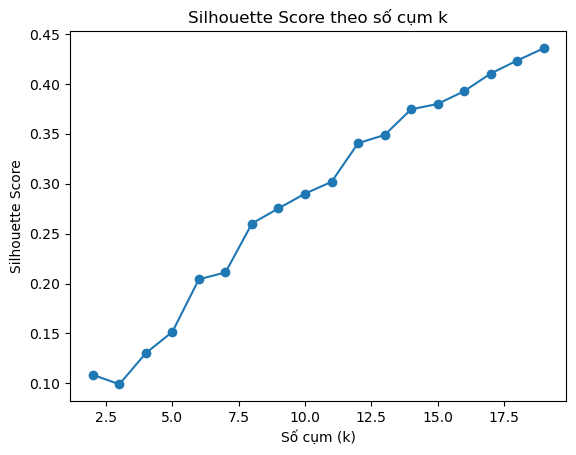

In [1520]:
import matplotlib.pyplot as plt

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Số cụm (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score theo số cụm k')
plt.show()

C:\Users\tchoang\AppData\Local\Temp\ipykernel_11532\3971106088.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


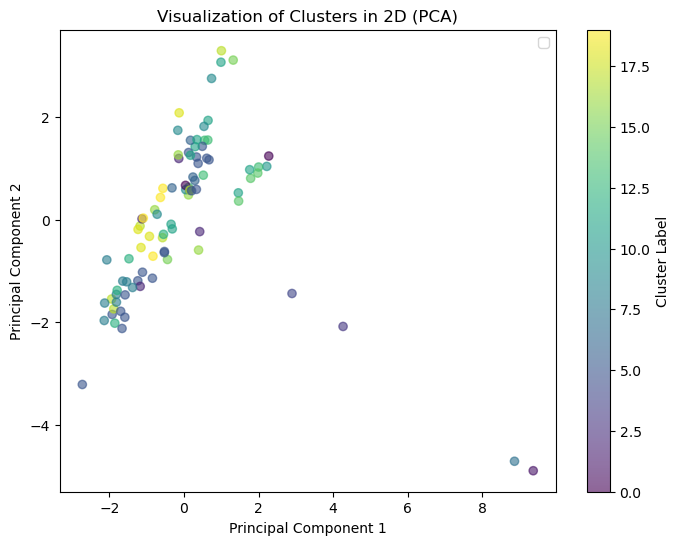

In [1521]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)

# Vẽ scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
# Thêm centroid (tùy chọn)
#centroids = kmeans.cluster_centers_
#centroids_pca = pca.transform(scaler.transform(centroids))
#plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=200, label='Centroids')

# Thêm tiêu đề và nhãn
plt.title('Visualization of Clusters in 2D (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(scatter, label='Cluster Label')
plt.show()

# Try to handle type_of_view with 3 different techniques: TF-IDF, BoW, Word Embedding and test with K-means to see which method is the best

## BoW

In [1522]:

'''
label/one-hot?/binary for categorical features
Test TF-IDF, BoW, and Word embeddings for type_of_view, evaluate with K-means using Silhouette Score, select TF-IDF if best.
Process type, region (one-hot encoding), difficulty (Label Encoding), normalize with StandardScaler.
Use best type to test K-means, DBSCAN, GMM, Hierarchical Clustering; compare Silhouette Scores + interpretability <=> comparable table? -> explain
Visualize best clusters with scatter plot (PCA) and word cloud.
Document: Describe experiments, comparison table, explain cluster meanings (trail recommendations).'''

'\nlabel/one-hot?/binary for categorical features\nTest TF-IDF, BoW, and Word embeddings for type_of_view, evaluate with K-means using Silhouette Score, select TF-IDF if best.\nProcess type, region (one-hot encoding), difficulty (Label Encoding), normalize with StandardScaler.\nUse best type to test K-means, DBSCAN, GMM, Hierarchical Clustering; compare Silhouette Scores + interpretability <=> comparable table? -> explain\nVisualize best clusters with scatter plot (PCA) and word cloud.\nDocument: Describe experiments, comparison table, explain cluster meanings (trail recommendations).'